## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    Which variables are significant in predicting the demand for shared bikes.
    How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

The goal is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

#### Defining reusable methods

In [2]:
def regplot(title, x, y, xlabel, ylabel):
    plt.figure(figsize=(6,5),dpi=80)
    plt.title(title,fontsize=16)
    sns.regplot(x=x, y=y, data=bike_sharing)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [3]:
def regplots(features):
    plt.figure(figsize=(16,15),dpi=100)
    for i in range(1,len(features)+1):
        plt.subplot(3,3,i)
        sns.regplot(features[i-1], y='cnt', data=bike_sharing)
        plt.ylabel("cnt")

In [4]:
def boxplot(features):
    plt.figure(figsize=(16,14))
    for i in range(1,len(features)+1):
        plt.subplot(3,3,i)
        sns.boxplot(x=features[i-1], y='cnt',data=bike_sharing)

In [5]:
def build_ols_model(features) :
    X_train_sm = X_train[features]
    X_train_sm = sm.add_constant(X_train_sm)
    lr = sm.OLS(y_train, X_train_sm)
    lr_model  = lr.fit()
    return lr_model

In [6]:
def build_sk_model(X_train, y_train):
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    return lr

In [7]:
def vif(features):
    vif = pd.DataFrame()
    vif['Features'] = features
    vif['VIF']=[variance_inflation_factor(X_train.values, i) for i in range(len(features))]
    vif['VIF']=round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

#### Reading

In [8]:
pd.set_option('display.max_columns',None)
bike_sharing = pd.read_csv("day.csv")
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Understanding

Here we can infer the significance of individual variables


#### Checking the brief summary of the dataframe to 
- find total number of rows & columns before any processsing
- Columns names and data types
- Getting brief statistical information of the data which helps to form an idea about the values like range(min & max),percentiles(25,50 & 75),standard deviation(std), etc
- Checking for duplicate rows if any throughout the dataframe. Oberved below that there is no duplicate row.

In [9]:
#Understanding data
print(bike_sharing.shape)
print(bike_sharing.info(verbose=True,null_counts=True))
print(bike_sharing.describe())

(730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None
          instant      season          yr        mnth     holiday     weekday 

#### Inferences:
- Observed that the dataset contains 730 rows and 16 columns
- Memory usage is 91.4 KB
- The mean is almost equal to the 50th percentile for most of the columns. There is no outliers in the dataset.
- The columns does not have any null values
- Most of the columns are of type int or float type including the categorical columns
- Few of the columns such as dteday, casual, registered etc seems to be redundant as similar values are already inferred from other columns 

## Dataquality check 
Here we will check quality of the data and clean/enrich those as and when required
##### Cleaning includes:
- Fixing rows & columns
- Fixing missing values
- Standardizing values
- Fixing invalid values
- Filtering Data

In [10]:
print("Percentage of missing values in each column")
print(round(100*(bike_sharing.isnull().sum()/len(bike_sharing)), 2).sort_values(ascending=False))
print("=================================")
print("Percentage of missing values in each row")
print(round((bike_sharing.isnull().sum(axis=1)/len(bike_sharing))*100,2).sort_values(ascending=False))
print("Number of duplicate rows: ",len(bike_sharing[bike_sharing.duplicated()]))

Percentage of missing values in each column
cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64
Percentage of missing values in each row
729    0.0
250    0.0
248    0.0
247    0.0
246    0.0
      ... 
484    0.0
483    0.0
482    0.0
481    0.0
0      0.0
Length: 730, dtype: float64
Number of duplicate rows:  0


#### Inferences 
- There are no missing or null values in each row or columns
- There is no duplicate rows in the dataset

We can use dteday to calculate age of a transaction that might show us its impact on business. So creating s derived column for aging

In [11]:
bike_sharing['aging'] = (pd.to_datetime(bike_sharing['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days
bike_sharing


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,aging
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114,725
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095,726
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,727
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,728


#### Data cleaning
- instant column is a row identifier and may not be useful for prediction. Hence can be dropped.
- The dataset already have month and year information, so column dteday seems to be redundant and can be dropped
- The dataset have cnt column that is sum of registered and casual, so these two column can be dropped

In [12]:
bike_sharing.drop(['instant','dteday','registered','casual'], axis = 1, inplace = True)
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  aging       730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


Let us convert the categorical columns to proper form as per the data dictionary

In [13]:
bike_sharing.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bike_sharing.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_sharing.mnth = bike_sharing.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_sharing.weekday = bike_sharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike_sharing.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,aging
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


#### Data Analysis

#### Continuous variables
Let us visualize the continuous variable and see their relationship with target variable cnt

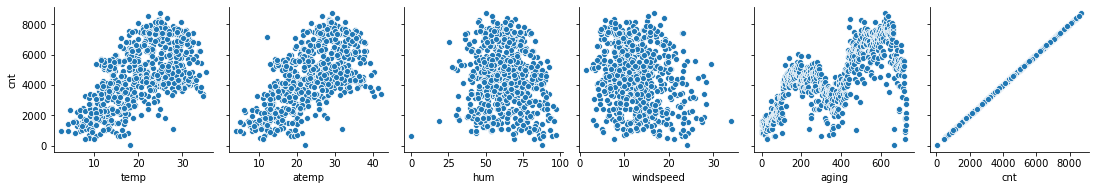

In [14]:
continuous_vars = ["temp","atemp","hum","windspeed","aging","cnt"];
sns.pairplot(bike_sharing, x_vars = continuous_vars, y_vars = ["cnt"])
plt.show()

#### Inference
- From the pairplot it can be inferred that temp and atemp is very much related to target variable cnt
- temp and atemp is highly correlated. Either on of them should be used in prediction.
- windspeed and hum value are more scattered and a clear linear relation with cnt is not visible

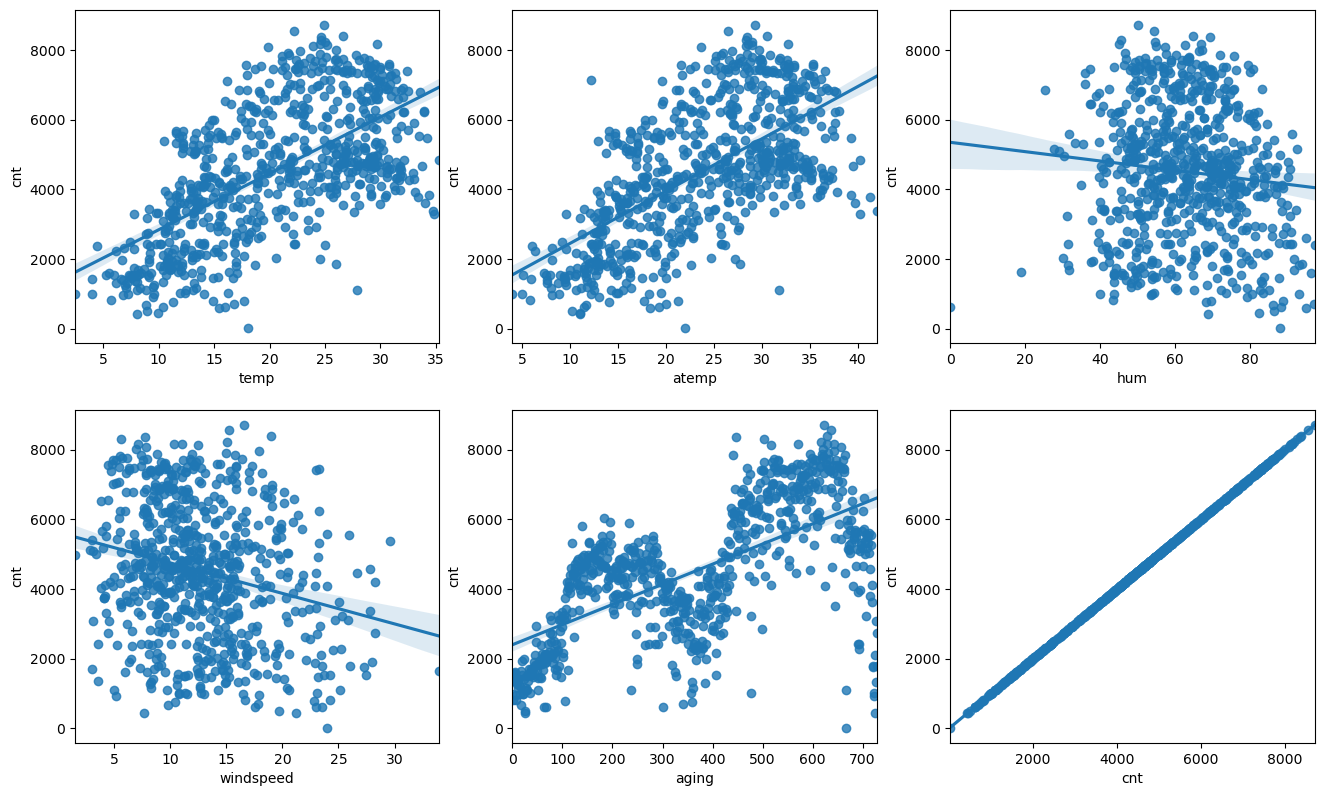

In [15]:
regplots(continuous_vars)

Let us see the correlation among the continuous variables

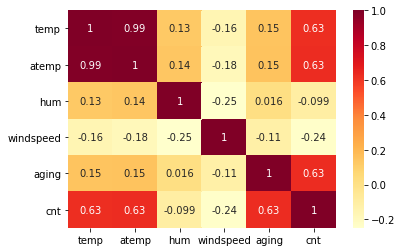

In [16]:
sns.heatmap(bike_sharing[continuous_vars].corr(), cmap='YlOrRd', annot = True)

It can be observed that correlation among temp and atemp is 0.99 which is very high. So column atemp can be dropped.

In [17]:
bike_sharing.drop(["atemp"], axis = 1, inplace = True)
bike_sharing.head()
continuous_vars.remove("atemp")

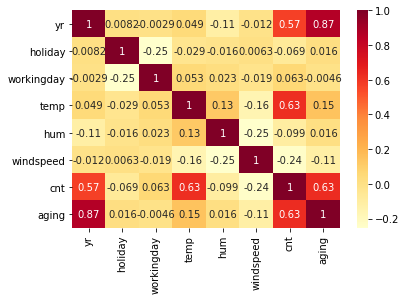

In [18]:
sns.heatmap(bike_sharing.corr(), cmap='YlOrRd', annot = True)

#### Categorical variables
Let us visualize the Categorical variables and see their relationship with target variable cnt

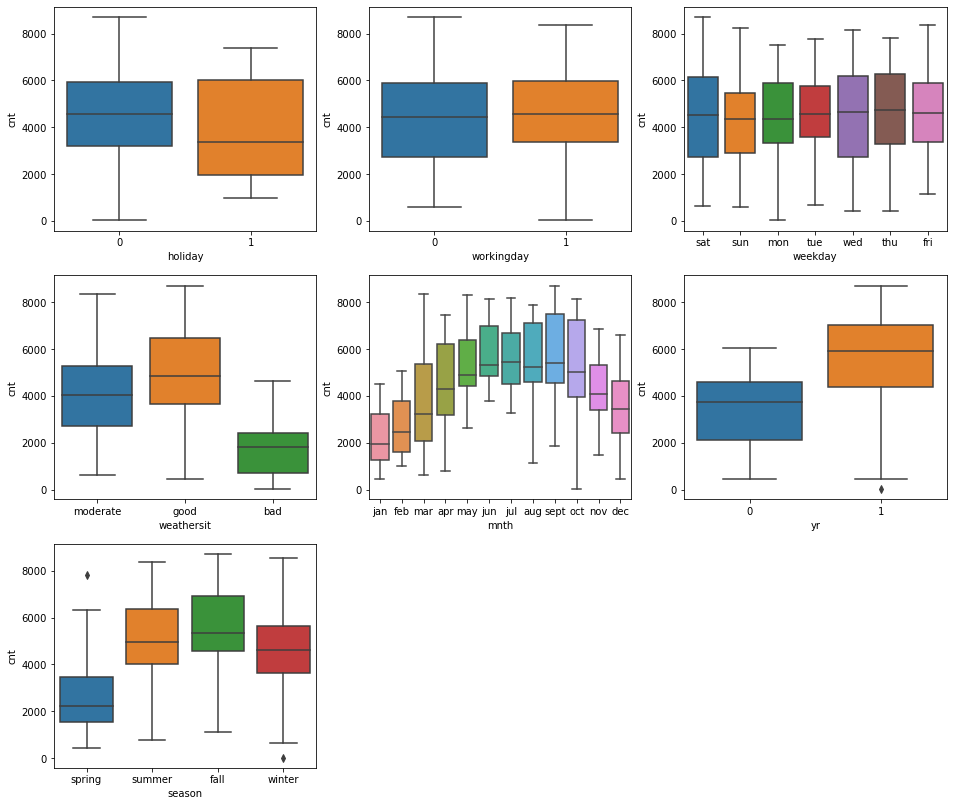

In [19]:
## visualising categorical variables
categorical_vars = ['holiday', 'workingday', 'weekday', 'weathersit', 'mnth', 'yr', 'season']
boxplot(categorical_vars)

#### Inference:
- The number of people using bike sharing on holiday is less than non-holiday. Average number of bike sharing is slightly more on a working day.
- There is no significant impact of weekday on bike sharing count.
- A good weather situation attracting more bike sharing and it is least on bad weather.
- Average demand for bike sharing is gradually increasing from January to July and gradually decreases from july to december. July shows the highest average bike sharing. This might be a correlation of season.
- From 2018 to 2019, the demand for bike sharing has drastically increased.
- Demand for bike sharing is highest in the fall season and is least on spring season.

## Preparing the data for modelling
1. Encoding
    - Converting binary vars to 1/0
    - Other categorical vars to dummy vars
2. Splitting into train and test
3. Rescalling of variables

### Encoding
Columns with binary values such as holiday and workingday are already in 0/1 integral form

#### Creating dummy variables

In [20]:
categorical_vars

['holiday', 'workingday', 'weekday', 'weathersit', 'mnth', 'yr', 'season']

Creating dummy variables for 'weekday','weathersit', 'mnth' and 'season' dropping the first dummy since p-1 values can explain all the scenarios

In [21]:
## creating dummy vars from furnishingstatus
bike_sharing = pd.get_dummies(data = bike_sharing, columns = ['weekday','weathersit', 'mnth', 'season'], drop_first=True)
bike_sharing.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aging,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,season_spring,season_summer,season_winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,3,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,4,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


#### Splitting the data into train and test set

In [22]:
bike_sharing_train, bike_sharing_test = train_test_split(bike_sharing, train_size= 0.7, random_state=100)
print("Shape of train set: ", bike_sharing_train.shape)
print("Shape of test set: ", bike_sharing_test.shape)

Shape of train set:  (510, 30)
Shape of test set:  (220, 30)


#### Rescalling of Continuous Variables

In [23]:
scaler = MinMaxScaler()
bike_sharing_train[continuous_vars] = scaler.fit_transform(bike_sharing_train[continuous_vars])
bike_sharing_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aging,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,season_spring,season_summer,season_winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.505055,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.345098,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.287907,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.475867,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.255838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.510989,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.757898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
bike_sharing_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aging,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,season_spring,season_summer,season_winter
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0.791209,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0.585165,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1.000000,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0.662088,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0.152473,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


With the above steps data preparation for model building is done. We can see that all values are numeric and normalized with the range of (0,1). The dataset is also divided into train and test set.

## Model Building

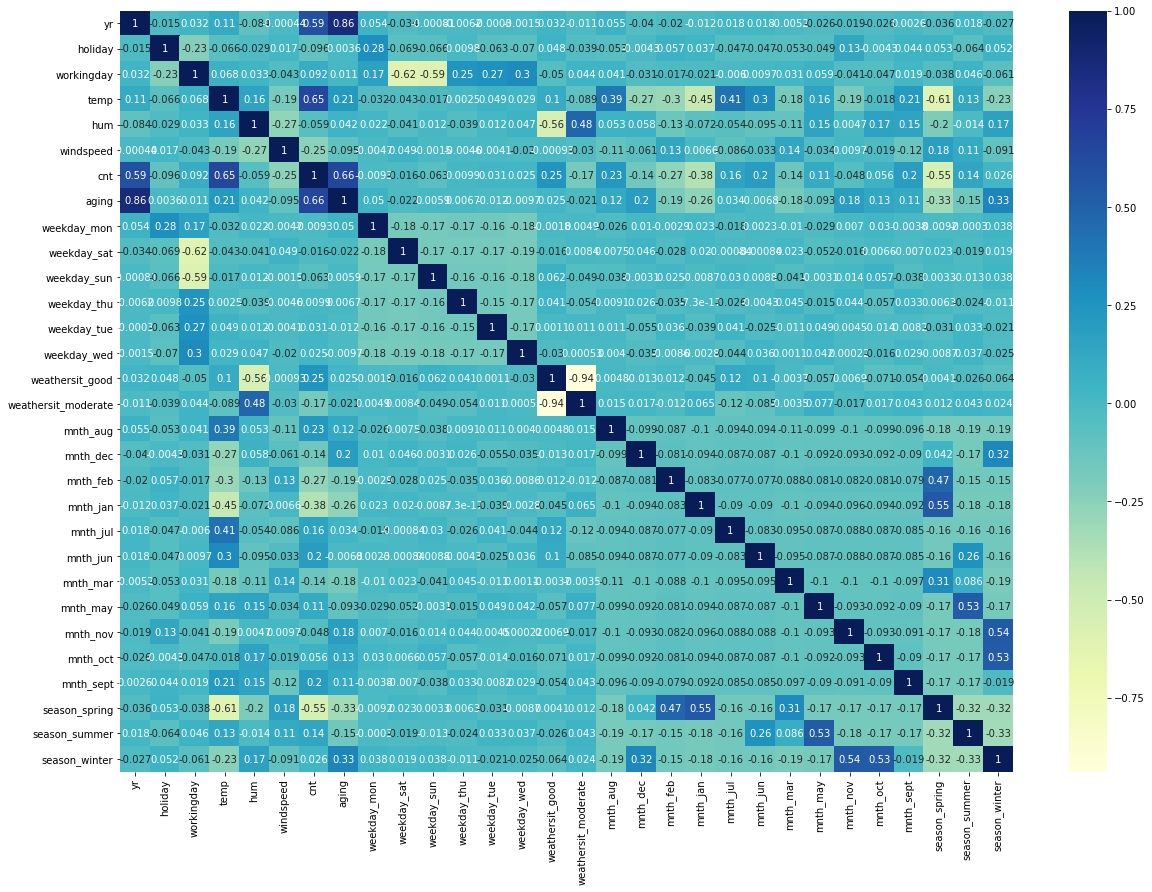

In [25]:
#heatmap
plt.figure(figsize = (20,14))
sns.heatmap(bike_sharing_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [26]:
#X_train, y_train
y_train = bike_sharing_train.pop("cnt")
X_train = bike_sharing_train
print("Target shape: ", y_train.shape)
print("Dependent variables shape: ", X_train.shape)

Target shape:  (510,)
Dependent variables shape:  (510, 29)


In [27]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,aging,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,season_spring,season_summer,season_winter
576,1,0,1,0.815169,0.725633,0.264686,0.791209,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.585165,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,1.000000,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.662088,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.152473,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### Automatic feature selection using RFE

In [28]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Select top 15 features from train set

In [29]:
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [30]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aging', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 12),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1),
 ('mnth_aug', False, 5),
 ('mnth_dec', False, 14),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 7),
 ('mnth_mar', False, 13),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 15),
 ('mnth_oct', False, 3),
 ('mnth_sept', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1)]

In [31]:
rfe_cols = bike_sharing_train.columns[rfe.support_]
rfe_cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'aging',
       'weekday_sat', 'weathersit_good', 'weathersit_moderate', 'mnth_jan',
       'mnth_jul', 'mnth_sept', 'season_spring', 'season_winter'],
      dtype='object')

In [32]:
print(build_ols_model(rfe_cols).summary())
print(vif(rfe_cols))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     182.3
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.02e-190
Time:                        23:58:56   Log-Likelihood:                 517.60
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     494   BIC:                            -935.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0695    

#### Dropping columns manually

Dropping the variables manually based on below condition-
- High p-value, high VIF: less significant, drop it
- High-Low
    - High p, Low VIF eg semi-furnished : remove these first
    - Low p, high VIF eg bedrooms : remove these after the ones above
- Low p, low VIF: more significant, keep it

In [33]:
rfe_cols = rfe_cols.drop('holiday')
print(build_ols_model(rfe_cols).summary())
print(vif(rfe_cols))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.7
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.79e-190
Time:                        23:58:56   Log-Likelihood:                 515.40
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     495   BIC:                            -937.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0622    

In [34]:
rfe_cols = rfe_cols.drop('aging')
print(build_ols_model(rfe_cols).summary())
print(vif(rfe_cols))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          6.71e-190
Time:                        23:58:56   Log-Likelihood:                 511.25
No. Observations:                 510   AIC:                            -994.5
Df Residuals:                     496   BIC:                            -935.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0451    

In [35]:
rfe_cols = rfe_cols.drop('mnth_jan')
print(build_ols_model(rfe_cols).summary())
print(vif(rfe_cols))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.7
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          6.85e-190
Time:                        23:58:56   Log-Likelihood:                 508.43
No. Observations:                 510   AIC:                            -990.9
Df Residuals:                     497   BIC:                            -935.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0372    

#### Building final model using sklearn

In [36]:
sklr = build_sk_model(X_train[rfe_cols], y_train)
print("Model score: ",sklr.score(X_train[rfe_cols], y_train))
print("Coeficients: ", sklr.coef_)
print("Intercept value: ", sklr.intercept_)

Model score:  0.8413847288979162
Coeficients:  [ 0.23107767  0.05160255  0.47739588 -0.14645355 -0.1691798   0.06149545
  0.24916422  0.19163759 -0.07713961  0.05689735 -0.10944842  0.0545622 ]
Intercept value:  0.037167750909959996


## Model Evaluation

#### Residual Analysis on Train set

In [37]:
y_train_pred = sklr.predict(X_train[rfe_cols])

Mean of Residuals -1.040017745126801e-16


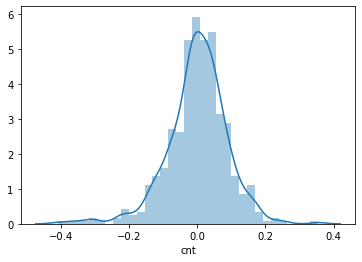

In [38]:
train_res = y_train - y_train_pred
mean_residuals = np.mean(train_res)
print("Mean of Residuals {}".format(mean_residuals))
sns.distplot(train_res)

#### Homoscedasticity Check

Text(0, 0.5, 'Residuals')

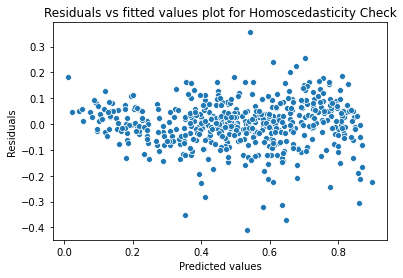

In [39]:
plt.title("Residuals vs fitted values plot for Homoscedasticity Check")
sns.scatterplot(y_train_pred, train_res)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

#### Scale test variables

In [40]:
#### Only tranform on test dataset as scaler is already fit on train dataset
bike_sharing_test[continuous_vars] = scaler.transform(bike_sharing_test[continuous_vars])
bike_sharing_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aging,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,season_spring,season_summer,season_winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.490559,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.654545,0.318182,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.294116,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.476601,0.466833,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.004121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.234203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.480082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.740041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.001374,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Prediction

In [41]:
y_test = bike_sharing_test.pop("cnt")
X_test = bike_sharing_test
y_test_pred = sklr.predict(X_test[rfe_cols])

R-Squared score for test prediction

In [42]:
r2_score(y_test, y_test_pred)

0.8211199117949668

#### Residual Analysis on test set

Mean of Residuals 0.004050791832882562


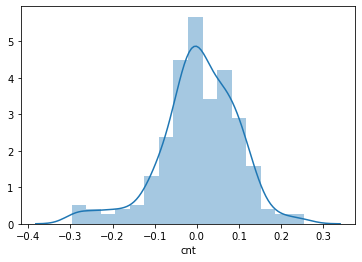

In [43]:
residuals = y_test - y_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))
sns.distplot(residuals)

In [44]:
#### Homoscedasticity Check on test set

Text(0, 0.5, 'Residuals')

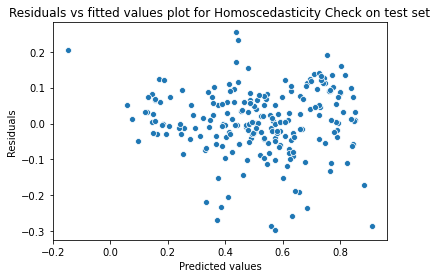

In [45]:
plt.title("Residuals vs fitted values plot for Homoscedasticity Check on test set")
sns.scatterplot(y_test_pred, residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

#### Inference 

- The mean of residuals is found to be -1.040017745126801e-16 which very close to 0.
- It can be observed from the displots of the residual errors that the error terms are normally distributed with mean 0 in both test and train dataset predictions
- In the scatterplot of residuals vs fitted values, there is no definite patterns observed. So it can be inferred that Homoscedasticity obtained
- So the chosen features seems proper